### Lab02 

### 2021-09-09

### Moments: Examples: Functions for Mean and Variance in Python 

In [1]:
import numpy as np

In [2]:
def fn_mean_var(data):
    
    if len(data) == 0: 
        return (None, None)

    mean = sum(data) / len(data)
    var = sum((data - mean)** 2) / len(data)
    
    return (mean, var)



data = np.array((range(10)))
print(data)
print(fn_mean_var(data))

[0 1 2 3 4 5 6 7 8 9]
(4.5, 8.25)


In [3]:
def fn_mean_var_second(data):

    if len(data) == 0:
        return (None, None)

    mean = sum(data) / len(data)
    var = sum((data - mean) ** 2) / len(data)

    # return a dictionary object
    # so we have control of the output
    return {
        "mean": mean,
        "var": var,
    }


data = np.array((range(10)))
print(data)
print(fn_mean_var_second(data))

[0 1 2 3 4 5 6 7 8 9]
{'mean': 4.5, 'var': 8.25}


In [4]:
# Always use a "standard" implementation if exists

def fn_mean_var_third(data):
    # the function translates data into a numpy array
    # and applies the methods for mean and var
    return {"mean": np.array(data).mean(), "var": np.array(data).var()}


data = list(range(10))
print(data)
print(fn_mean_var_third(data))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
{'mean': 4.5, 'var': 8.25}


### Functions to calculate first 10 moments:


Recall from lecture: 

$$M_k := E(X - E(X))^k$$

In [5]:
def fn_moments(data, number_of_moments=10):

    if len(data) == 0:
        return None

    data = np.array(data)
    mean = data.mean()

    # return a dictionary: where k points to k-th moment
    return {k: np.array((data - mean) ** k).mean() for k in range(number_of_moments)}


data = list(range(10))
print("date: ", data)
print("momdents:", fn_moments(data))

date:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
momdents: {0: 1.0, 1: 0.0, 2: 8.25, 3: 0.0, 4: 120.8625, 5: 0.0, 6: 2079.515625, 7: 0.0, 8: 38444.30390625, 9: 0.0}


Examine the 0th moment; 

Examine the odd moments: What values do they take? Does it makes sense? 

### Generate random variables 

In [6]:
### generate 1000 i.i.d. random variables X_i's:


### X_i follows unif[0, 1]
number_of_samples = 1000
sample_uniform = np.random.uniform(0, 1, number_of_samples)

# display first 10
sample_uniform[ :10]

array([0.39832695, 0.18521393, 0.46254488, 0.73017618, 0.9121479 ,
       0.04953912, 0.94611426, 0.21311086, 0.24772881, 0.3451323 ])

In [7]:
# examine our function
fn_mean_var_third(sample_uniform)

{'mean': 0.5116874546484749, 'var': 0.08434051651951975}

In [8]:
### generate 1000 i.i.d. random variables X_i's:

### X_i follows normal N(0, 1)
number_of_samples = 1000
mu, sigma = 0, 1
sample_normal = np.random.normal(mu, sigma, number_of_samples)

# display first 10
sample_normal[ :10]

array([-0.30349567,  0.22718967, -1.5435742 , -0.42098806,  0.31968847,
       -0.07634775,  0.27441126, -1.14210872, -1.19705341,  0.00924654])

In [9]:
# examine our function
fn_mean_var_third(sample_normal)

{'mean': 0.008323789932932467, 'var': 0.9264862706851009}

### plot histograms: 

In [10]:
import matplotlib.pyplot as plt

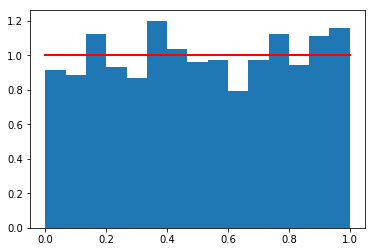

In [11]:

count, bins, ignored = plt.hist(sample_uniform, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

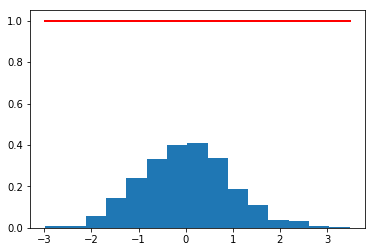

In [12]:
count, bins, ignored = plt.hist(sample_normal, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

### CDF for Uniform Distribution

Text(0, 0.5, '')

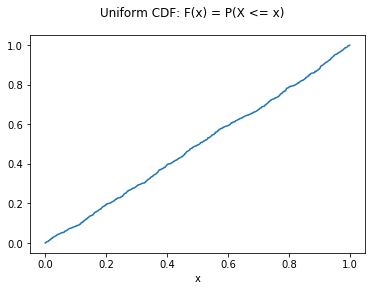

In [13]:
### sample_uniform

sorted_random_data = np.sort(sample_uniform)
x = np.arange(len(sorted_random_data)) / float(len(sorted_random_data) - 1)

fig = plt.figure()
fig.suptitle('Uniform CDF: F(x) = P(X <= x)')
ax = fig.add_subplot(111)
ax.plot(sorted_random_data, x)
ax.set_xlabel('x')
ax.set_ylabel('')

### CDF for Normal Distribution

Text(0, 0.5, '')

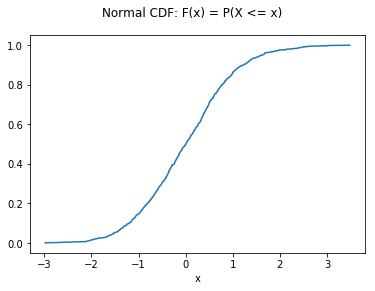

In [14]:
### sample_normal

sorted_random_data = np.sort(sample_normal)
x = np.arange(len(sorted_random_data)) / float(len(sorted_random_data) - 1)

fig = plt.figure()
fig.suptitle('Normal CDF: F(x) = P(X <= x)')
ax = fig.add_subplot(111)
ax.plot(sorted_random_data, x)
ax.set_xlabel('x')
ax.set_ylabel('')